In [1]:
import pandas as pd 
import yfinance as yfin
import matplotlib.pyplot as plt 
import os
import plotly.express as px
import glob

/Users/bat/Documents/PhD/pFolder/phd_venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
spy_500_str = 'SPY'
start = '1995-01-01'
end = '2020-01-01'
interval = '1d'

In [3]:
spy = yfin.Ticker(spy_500_str)
spy_data = spy.history(start=start, end=end, period=interval)
spy_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1995-01-03 00:00:00-05:00,26.941002,27.023897,26.931791,26.987055,324300,0.0,0.0,0.0
1995-01-04 00:00:00-05:00,27.106789,27.115999,26.968630,27.115999,351800,0.0,0.0,0.0
1995-01-05 00:00:00-05:00,27.134420,27.180473,27.088367,27.115999,89800,0.0,0.0,0.0
1995-01-06 00:00:00-05:00,27.171286,27.263392,27.060758,27.143654,448400,0.0,0.0,0.0
1995-01-09 00:00:00-05:00,27.134437,27.171280,27.116016,27.171280,36800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,299.045790,299.092291,298.515544,298.822540,20270000,0.0,0.0,0.0
2019-12-26 00:00:00-05:00,299.213276,300.422611,299.203993,300.413300,30911200,0.0,0.0,0.0
2019-12-27 00:00:00-05:00,301.157457,301.213269,299.799307,300.338837,42528800,0.0,0.0,0.0


In [4]:
gspc_ticker = yfin.Ticker('^GSPC')
gspc_data = gspc_ticker.history(start=start, end=end, period=interval)
gspc_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,0.0,0.0
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,0.0,0.0
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,0.0,0.0
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,0.0,0.0
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,3225.449951,3226.429932,3220.510010,3223.379883,1296530000,0.0,0.0
2019-12-26 00:00:00-05:00,3227.199951,3240.080078,3227.199951,3239.909912,2164540000,0.0,0.0
2019-12-27 00:00:00-05:00,3247.229980,3247.929932,3234.370117,3240.020020,2429150000,0.0,0.0


In [8]:

# Assuming you have a DataFrame `data` with columns 'SPY' and '^GSPC' containing prices
spy_data['SPY_returns'] = spy_data['Close'].pct_change()
gspc_data['GSPC_returns'] = gspc_data['Close'].pct_change()

In [10]:
spy_data = spy_data.dropna()
spy_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,SPY_returns
Date,,,,,,,,,
1995-01-04 00:00:00-05:00,27.106798,27.116009,26.968639,27.116009,351800,0.0,0.0,0.0,0.004778
1995-01-05 00:00:00-05:00,27.134430,27.180483,27.088377,27.116009,89800,0.0,0.0,0.0,0.000000
1995-01-06 00:00:00-05:00,27.171278,27.263384,27.060751,27.143646,448400,0.0,0.0,0.0,0.001019
1995-01-09 00:00:00-05:00,27.134420,27.171263,27.115999,27.171263,36800,0.0,0.0,0.0,0.001017
1995-01-10 00:00:00-05:00,27.235731,27.346258,27.198889,27.198889,229800,0.0,0.0,0.0,0.001017
...,...,...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,299.045820,299.092321,298.515574,298.822571,20270000,0.0,0.0,0.0,0.000031
2019-12-26 00:00:00-05:00,299.213245,300.422581,299.203962,300.413269,30911200,0.0,0.0,0.0,0.005323
2019-12-27 00:00:00-05:00,301.157457,301.213269,299.799307,300.338837,42528800,0.0,0.0,0.0,-0.000248


In [12]:
gspc_data = gspc_data.dropna()
gspc_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,GSPC_returns
Date,,,,,,,,
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,0.0,0.0,0.003485
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,0.0,0.0,-0.000803
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,0.0,0.0,0.000739
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,0.0,0.0,0.000326
1995-01-10 00:00:00-05:00,460.899994,464.589996,460.899994,461.679993,352450000,0.0,0.0,0.001845
...,...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,3225.449951,3226.429932,3220.510010,3223.379883,1296530000,0.0,0.0,-0.000195
2019-12-26 00:00:00-05:00,3227.199951,3240.080078,3227.199951,3239.909912,2164540000,0.0,0.0,0.005128
2019-12-27 00:00:00-05:00,3247.229980,3247.929932,3234.370117,3240.020020,2429150000,0.0,0.0,0.000034


In [17]:
my_data = pd.concat([spy_data['SPY_returns'], gspc_data['GSPC_returns']], axis=1)

In [18]:

# Calculate covariance between SPY and ^GSPC
covariance = my_data['SPY_returns'].cov(my_data['GSPC_returns'])

# Calculate variance of ^GSPC
variance = my_data['GSPC_returns'].var()

# Calculate beta
beta = covariance / variance
print("Beta of SPY relative to ^GSPC:", beta)


Beta of SPY relative to ^GSPC: 0.9971575649243997


In [12]:
msft_str = 'MSFT'
msft_ticker = yfin.Ticker(msft_str)
msft_data = msft_ticker.history(start=start, end=end, period=interval)
msft_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-03 00:00:00-05:00,2.370034,2.370034,2.317046,2.319454,39545600,0.0,0.0
1995-01-04 00:00:00-05:00,2.321861,2.341130,2.292958,2.336313,51611200,0.0,0.0
1995-01-05 00:00:00-05:00,2.345947,2.350764,2.288141,2.297776,39824000,0.0,0.0
1995-01-06 00:00:00-05:00,2.307410,2.360398,2.302593,2.336313,46681600,0.0,0.0
1995-01-09 00:00:00-05:00,2.345948,2.350765,2.302593,2.321862,46000000,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,150.928839,151.149282,150.583814,150.833008,8989200,0.0,0.0
2019-12-26 00:00:00-05:00,151.005496,152.126822,150.852149,152.069321,14520600,0.0,0.0
2019-12-27 00:00:00-05:00,152.816851,152.912697,151.638023,152.347244,18412800,0.0,0.0


In [20]:
msft_data['MSFT_returns'] = msft_data['Close'].pct_change()
msft_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MCSF_returns
Date,,,,,,,,
1995-01-03 00:00:00-05:00,2.370034,2.370034,2.317045,2.319454,39545600,0.0,0.0,NaN
1995-01-04 00:00:00-05:00,2.321862,2.341131,2.292959,2.336314,51611200,0.0,0.0,0.007269
1995-01-05 00:00:00-05:00,2.345947,2.350764,2.288142,2.297776,39824000,0.0,0.0,-0.016495
1995-01-06 00:00:00-05:00,2.307411,2.360399,2.302593,2.336314,46681600,0.0,0.0,0.016772
1995-01-09 00:00:00-05:00,2.345946,2.350763,2.302592,2.321860,46000000,0.0,0.0,-0.006186
...,...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,150.928824,151.149266,150.583799,150.832993,8989200,0.0,0.0,-0.000191
2019-12-26 00:00:00-05:00,151.005481,152.126807,150.852133,152.069305,14520600,0.0,0.0,0.008197
2019-12-27 00:00:00-05:00,152.816927,152.912773,151.638099,152.347321,18412800,0.0,0.0,0.001828


In [21]:
msft_data = msft_data.dropna()
msft_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MCSF_returns
Date,,,,,,,,
1995-01-04 00:00:00-05:00,2.321862,2.341131,2.292959,2.336314,51611200,0.0,0.0,0.007269
1995-01-05 00:00:00-05:00,2.345947,2.350764,2.288142,2.297776,39824000,0.0,0.0,-0.016495
1995-01-06 00:00:00-05:00,2.307411,2.360399,2.302593,2.336314,46681600,0.0,0.0,0.016772
1995-01-09 00:00:00-05:00,2.345946,2.350763,2.302592,2.321860,46000000,0.0,0.0,-0.006186
1995-01-10 00:00:00-05:00,2.336313,2.370033,2.331496,2.350765,42184000,0.0,0.0,0.012449
...,...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,150.928824,151.149266,150.583799,150.832993,8989200,0.0,0.0,-0.000191
2019-12-26 00:00:00-05:00,151.005481,152.126807,150.852133,152.069305,14520600,0.0,0.0,0.008197
2019-12-27 00:00:00-05:00,152.816927,152.912773,151.638099,152.347321,18412800,0.0,0.0,0.001828


In [22]:
my_data2 = pd.concat([mcsf_data['MCSF_returns'], gspc_data['GSPC_returns']], axis=1)
my_data2

,MCSF_returns,GSPC_returns
Date,,
1995-01-04 00:00:00-05:00,0.007269,0.003485
1995-01-05 00:00:00-05:00,-0.016495,-0.000803
1995-01-06 00:00:00-05:00,0.016772,0.000739
1995-01-09 00:00:00-05:00,-0.006186,0.000326
1995-01-10 00:00:00-05:00,0.012449,0.001845
...,...,...
2019-12-24 00:00:00-05:00,-0.000191,-0.000195
2019-12-26 00:00:00-05:00,0.008197,0.005128
2019-12-27 00:00:00-05:00,0.001828,0.000034


In [26]:
# Calculate covariance between SPY and ^GSPC
covariance2 = my_data2['MCSF_returns'].cov(my_data2['GSPC_returns'])

# Calculate variance of ^GSPC
variance2 = my_data2['GSPC_returns'].var()

# Calculate beta
beta2 = covariance2 / variance2
print("Beta of MCSF relative to ^GSPC:", beta2)


Beta of MCSF relative to ^GSPC: 1.1167788449088694


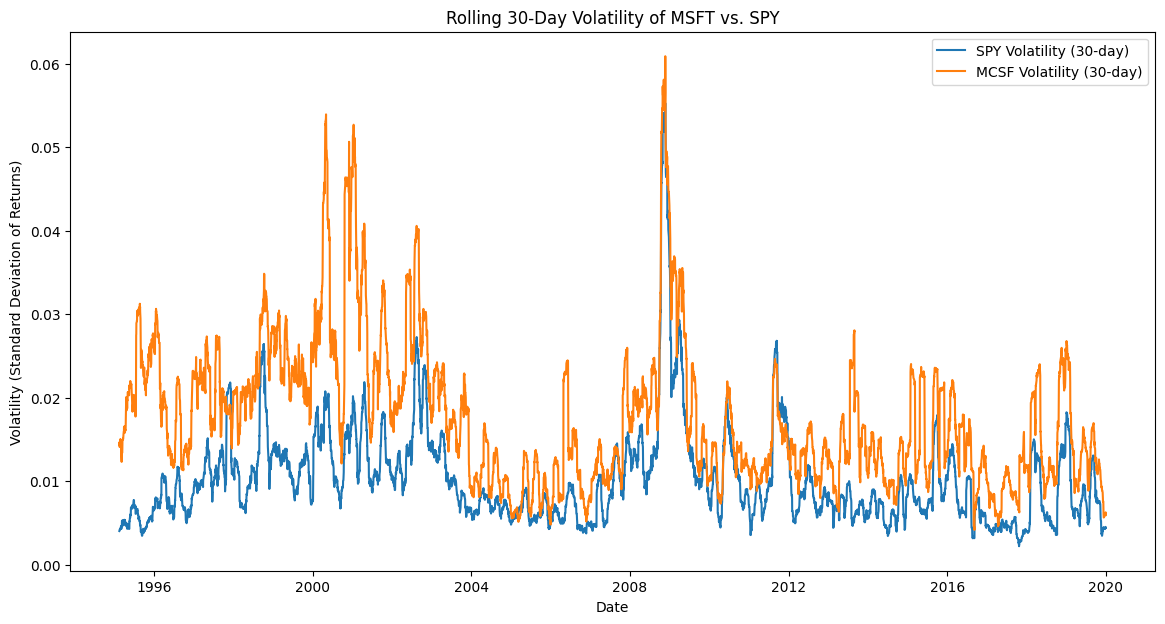

In [24]:

# Calculate rolling standard deviation (e.g., 30-day) to represent volatility
my_data['SPY_volatility'] = my_data['SPY_returns'].rolling(window=30).std()
my_data2['MCSF_volatility'] = my_data2['MCSF_returns'].rolling(window=30).std()

# Plot rolling volatility
plt.figure(figsize=(14, 7))
plt.plot(my_data.index, my_data['SPY_volatility'], label='SPY Volatility (30-day)')
plt.plot(my_data2.index, my_data2['MCSF_volatility'], label='MCSF Volatility (30-day)')
plt.title('Rolling 30-Day Volatility of MSFT vs. SPY')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation of Returns)')
plt.legend()
plt.show()

In [11]:
mcsf_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [19]:
spy_data
#gspc_data
#msft_data


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1995-01-03 00:00:00-05:00,26.941002,27.023897,26.931791,26.987055,324300,0.0,0.0,0.0
1995-01-04 00:00:00-05:00,27.106789,27.115999,26.968630,27.115999,351800,0.0,0.0,0.0
1995-01-05 00:00:00-05:00,27.134420,27.180473,27.088367,27.115999,89800,0.0,0.0,0.0
1995-01-06 00:00:00-05:00,27.171286,27.263392,27.060758,27.143654,448400,0.0,0.0,0.0
1995-01-09 00:00:00-05:00,27.134437,27.171280,27.116016,27.171280,36800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,299.045790,299.092291,298.515544,298.822540,20270000,0.0,0.0,0.0
2019-12-26 00:00:00-05:00,299.213276,300.422611,299.203993,300.413300,30911200,0.0,0.0,0.0
2019-12-27 00:00:00-05:00,301.157457,301.213269,299.799307,300.338837,42528800,0.0,0.0,0.0


In [18]:
gspc_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,0.0,0.0
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,0.0,0.0
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,0.0,0.0
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,0.0,0.0
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,3225.449951,3226.429932,3220.510010,3223.379883,1296530000,0.0,0.0
2019-12-26 00:00:00-05:00,3227.199951,3240.080078,3227.199951,3239.909912,2164540000,0.0,0.0
2019-12-27 00:00:00-05:00,3247.229980,3247.929932,3234.370117,3240.020020,2429150000,0.0,0.0


In [27]:
amd = 'AMD'
amd_ticker = yfin.Ticker(amd)
amd_data = amd_ticker.history(start=start, end=end, period=interval)
amd_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-03 00:00:00-05:00,12.625000,12.750000,12.437500,12.500000,1197200,0.0,0.0
1995-01-04 00:00:00-05:00,12.625000,12.875000,12.500000,12.812500,2357200,0.0,0.0
1995-01-05 00:00:00-05:00,12.750000,12.875000,12.687500,12.750000,1332400,0.0,0.0
1995-01-06 00:00:00-05:00,12.812500,13.937500,12.500000,13.937500,9025600,0.0,0.0
1995-01-09 00:00:00-05:00,14.375000,14.562500,14.250000,14.437500,5674800,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,46.099998,46.610001,45.770000,46.540001,44432200,0.0,0.0
2019-12-26 00:00:00-05:00,46.990002,47.310001,45.660000,46.630001,57562800,0.0,0.0
2019-12-27 00:00:00-05:00,46.849998,46.880001,45.980000,46.180000,36581300,0.0,0.0


In [29]:
demo_data = pd.concat([gspc_data['Close'], spy_data['Close'], msft_data['Close'],amd_data['Close']], axis=1)
demo_data.columns = ['GSPC','SPY','MSFT','AMD']
demo_data

,GSPC,SPY,MSFT,AMD
Date,,,,
1995-01-03 00:00:00-05:00,459.109985,26.987055,2.319454,12.500000
1995-01-04 00:00:00-05:00,460.709991,27.115999,2.336313,12.812500
1995-01-05 00:00:00-05:00,460.339996,27.115999,2.297776,12.750000
1995-01-06 00:00:00-05:00,460.679993,27.143654,2.336313,13.937500
1995-01-09 00:00:00-05:00,460.829987,27.171280,2.321862,14.437500
...,...,...,...,...
2019-12-24 00:00:00-05:00,3223.379883,298.822540,150.833008,46.540001
2019-12-26 00:00:00-05:00,3239.909912,300.413300,152.069321,46.630001
2019-12-27 00:00:00-05:00,3240.020020,300.338837,152.347244,46.180000


In [31]:
os.getcwd()

'/Users/bat/Documents/PhD/pFolder/src'

In [40]:
demo_data.to_csv('data/closing_data.csv')